# Correlation of max and min

Given $n$ iid Uniform(0, 1) variables $ X_1 \dots X_n$, denote min as $Y$ and max as $Z$

### Min-max expectation

Clearly

$$
P(Z \leq z) = \prod P(X_i \leq z) = z^n
$$

$$
f_Z(z) = n z^{n-1}
$$

$$
E[Z] = \int_0^1 z n z^{n-1} dz = n \int z^n dz = \frac{n}{n+1}
$$

Not hard to see that $P(Y\leq y) = 1 - (1-y)^n $ and $ E[Y] = \frac{1}{n+1}$ similarly

### 
We are now interested in conditional distribution $P(Y \leq y \mid Z \leq z) $

First consider $X_1, X_2 \sim \text{iid}$ $\text{Unif}(0, 1)$, and $Y = \min(X_1, X_2), Z = \max(X_1, X_2) $

Clearly $P(Y\leq y) = 1 - (1-y)^2 $ and $P(Z \leq z) = z^2$

When considering $ P(Y > y \mid Z \leq z) $, consider the plot below, where both axis are independent Unif(0, 1)

Obviously if $y > z$, this probability would be 0 as we must have $ Y \leq Z$. Assuming $y < z$:

We can see that $P(Y > y, Z \leq z) = (z-y)^2$, and that 
$P(Y \leq y, Z \leq z) = z^2 - (z-y)^2$,

Hence 

$$
P(Y \leq y \mid Z \leq z) = \frac{P(Y \leq y, Z \leq z)}{P(Z \leq z)} = \frac{z^2 - (z-y)^2}{z^2}
$$

which is the grey area below



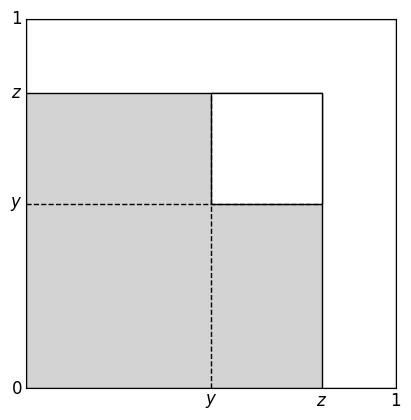

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

y,z = 0.5, 0.8

fig, ax = plt.subplots()
unit_square = patches.Rectangle((0, 0), 1, 1, edgecolor='black', facecolor='white')
ax.add_patch(unit_square)
square_z = patches.Rectangle((0, 0), z, z, edgecolor='black', facecolor='lightgray')
ax.add_patch(square_z)
square_y = patches.Rectangle((y, y), z-y, z-y, edgecolor='black', facecolor='white')
ax.add_patch(square_y)

ax.plot([y, y], [0, z], color='black', linestyle='--', linewidth=1)
ax.plot([0, z], [y, y], color='black', linestyle='--', linewidth=1)


ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

ax.text(y, -0.01, r'$y$', ha='center', va='top', fontsize=12, clip_on=False)
ax.text(z, -0.01, r'$z$', ha='center', va='top', fontsize=12, clip_on=False)
ax.text(-0.01, y, r'$y$', ha='right', va='center', fontsize=12, clip_on=False)
ax.text(-0.01, z, r'$z$', ha='right', va='center', fontsize=12, clip_on=False)
ax.text(1, -0.01, r'$1$', ha='center', va='top', fontsize=12, clip_on=False)
ax.text(-0.01, 0, r'$0$', ha='right', va='center', fontsize=12, clip_on=False)
ax.text(-0.01, 1, r'$1$', ha='right', va='center', fontsize=12, clip_on=False)

plt.grid(False)


Now one would expect that with $n$ iid $X_i$, we would have

$$
P(Y \leq y \mid Z \leq z) = \frac{z^n - (z-y)^n}{z^n}
$$

Let's check below

In [27]:
y,z = 0.1, 1
n = 5
(z**n - (z-y)**n) / z**n

0.40950999999999993

In [31]:
import numpy as np
N_sim = 1000000  # Number of simulations

X = np.random.uniform(0, 1, size=(N_sim, n))
Y = np.min(X, axis=1)
Z = np.max(X, axis=1)

prob_YZ = np.mean((Y <= y) & (Z <= z))
prob_Z = np.mean(Z <= z)
print(f"P(Y ≤ {y} | Z ≤ {z}) ≈ {prob_YZ / prob_Z:.4f}")

P(Y ≤ 0.1 | Z ≤ 1) ≈ 0.4091


In [33]:
# another way to simulate
A,B = 0,0
for _ in range(100000):
    X = np.random.uniform(0, 1, size=(n,))
    if np.max(X) <= z:
        B += 1
        if np.min(X) <= y:
            A += 1
print(f"P(Y ≤ {y} | Z ≤ {z}) ≈ {A / B:.4f}")

P(Y ≤ 0.1 | Z ≤ 1) ≈ 0.4078


### Correlation

To compute Corr($Y, Z$), again first consider $n=2$ case. We have

$$
\text{corr}(Y, Z) = \frac{ E[YZ] - E[Y] E[Z] }{ \sqrt{\text{Var}(Y) \text{Var}(Z)}}
$$ 

For $n=2$, we clearly have $ E[YZ] = E[X_1] E[X_2] = 1/4$, and recall we have $ E[Y] = 1/3$ 
and $ E[Z] = 2/3$. 

Recall $ F(z) = z^2$ so $f(z) = 2z$, and  $F(y) = 1-(1-y)^2$ so $f(y) = 2(1-y)$  
Hence we have $ E[Z^2] = \int z^2 (2z) dz = 2/4 $, so $\text{Var}(Z) = 1/2 - (2/3)^2 = 1/18$

Similarly $\text{Var}(Y) = 1/6 - (1/3)^2 = 1/18$ (we can claim so by symmetry)

Plugging in, we have 

$$
\text{corr}(Y, Z) = \frac{ \frac{1}{4} - \frac{1}{3} \cdot \frac{2}{3} }{ \sqrt{\frac{1}{18}^2}}
$$ 

$$
= \frac{1/36}{1/18} = \frac{1}{2}
$$

### n IID min-max corr

In fact, we can say that for $n$ iid Uniform, $\text{corr}(Y, Z) = \frac{1}{n} $

First recall

$$
P(Y \leq y \mid Z \leq z) = \frac{P(Y \leq y, Z \leq z)}{P(Z \leq z)} = \frac{z^n - (z-y)^n}{z^n}
$$

We note that for $y \in [0, z]:

$$
P(Y \leq y \mid Z = z) = \frac{P(Y \leq y, Z=z)}{f_Z(z)} = \frac{ \frac{d}{dz}(z^n - (z-y)^n)}{\frac{d}{dz} z^n}
$$

$$
= \frac{ nz^{n-1} - n(z-y)^{n-1} }{nz^{n-1}} = 1 - \frac{(z-y)^{n-1} }{z^{n-1}}
$$

Still we consider $n=2$ first, then

$$
P(Y \leq y \mid Z = z) = 1 - \frac{z-y}{z} = \frac{y}{z}
$$

and 

$$
P(Y=y \mid Z = z) = f(y|z) = \frac{d}{dy} P(Y \leq y \mid Z = z) = \frac{1}{z}
$$

Note we have $ \int_0^z f(y|z) dy = 1$ so this is a valid density of $y$

Now $\mathbb{E}[Y \mid Z] = \int y \; f(y|z) dy = \int_0^z \frac{y}{z} dy = \frac{1}{z} \frac{z^2}{2} = \frac{z}{2} $

We claim that in general, given the maximum $Z = z \in (0,1)$, the rest of the order statistics should be evenly spaced in between $(0, z)$ in expectation. 

Specifically, since there are $n - 1$ uniforms left, the expected order statistics should be $\frac{1}{n}z, \frac{2}{n}z, \ldots, \frac{n - 1}{n}z$. Then

$$
\mathbb{E}[Y \mid Z] = \frac{1}{n} Z.
$$

We have
\begin{align*}
\text{cov}(Y, Z)
&= \mathbb{E}[YZ] - \mathbb{E}[Y]\mathbb{E}[Z] \\
&= \mathbb{E}\left[ \mathbb{E}[YZ \mid Z] \right] - \mathbb{E}\left[ \mathbb{E}[Y \mid Z] \right] \mathbb{E}[Z] \quad \text{(tower rule)} \\
&= \mathbb{E}\left[ \mathbb{E}[Y \mid Z] Z \right] - \mathbb{E}\left[ \mathbb{E}[Y \mid Z] \right] \mathbb{E}[Z] \quad \text{(measurability)} \\
&= \mathbb{E}\left[\left(\frac{1}{n} Z\right) Z\right] - \mathbb{E}\left[\frac{1}{n} Z\right] \mathbb{E}[Z] \quad \text{(shown above)} \\
&= \frac{1}{n} \left( \mathbb{E}[Z^2] - \mathbb{E}[Z]^2 \right) \\
&= \frac{1}{n} \text{var}(Z)
\end{align*}

Then

$$
\text{corr}(Y, Z) = \frac{\text{cov}(Y, Z)}{\text{std}(Y) \, \text{std}(Z)} = \frac{\text{cov}(Y, Z)}{\text{std}(Z) \, \text{std}(Z)} = \frac{\text{cov}(Y, Z)}{\text{var}(Z)} = \frac{1}{n} \quad \text{(symmetry)}
$$
